<div style="text-align: center;"> <h3>Statistical Theory</h3>
<h5>Summative Assessment 1</h5>
<h5><u>By Romand Lansangan</u></h5>
    </div>
    
---

### Introduction
From personal to professional context, mobile phones have become an integral part of every individual's daily lives from all walks of life—a phenomenon especially true to college students. Understanding how much time they spend their time on their cellphones provides us a summary of the extent to how much college student's lives revolves around these rectangular boxes. Knowing such insights may prove to be critical on shaping the future courses of actions for the students and the institutions that might concern them. 

In this study, we shall utilize the data set from a study about *determining the average time spent on cellphones by male and female college students from Midwestern University*. In the said data set, we are presented with 2 columns, one for "Male" and other for "Females," with a sample size of 50 for each. Under the columns are the number of hours they spent talking on their cell phones per week.  
<!-- ![](https://github.com/RomandRapido/APM1111/blob/main/SA1-Lansangan/table_1.jpg?raw=true) -->

The pupropse of this study is to examine whether there is a significant difference in the average time spent talking on cellphones between the two demographics of college students.

### Methodology
#### Hypothesis
The goal is to determine if there is a statistically significant difference between the mean time spend on cell phones per week of males ($\mu_1$) and females ($\mu_2$) college students. We ought to use statistical hypothesis testing to verify the significant validity of the following hypothesis:

**Null Hypothesis ($H_0$)**: There is no significant difference in the average time spent talking on cellphones per week between males and females attending Midwestern University ($\mu_1 = \mu_2$).

**Alternative Hypothesis ($H_1$)**: There is a significant difference between the average time spent talking on cellphones per week between males and females attending Midwestern University ($\mu_1 \neq \mu_2$).

#### Statistical Testing Method
To test if there's a significant mean difference between two samples, we ought to conduct a **two-sample or independent t-test**, therefore we'll be working with t-distribution. We shall use the said test and distribution since our samples are independent from each other, have a relatively smaller sample size, and because a two samples t-test is computed relative to variance while taking into account the sample sizes through the use of degrees of freedom. 
$$
\mu_{1 \ - \ 2} = \frac{\mu_1 \ - \ \mu_2 \ - \ \mu_0}{\sigma_{1 \  - \ 2}} 
$$
where <br>
$\mu_{1 \ - \ 2}$ is the mean difference; <br>
$\mu_1$ is the mean of male students;<br>
$\mu_2$ is the mean of female students;<br>
$\mu_0$ is the null hypothesis. Since H0: $\mu_1=\mu_2$, the $\mu_0$ shall be 0 ($\mu_1 - \mu_2 = 0$);<br>
$\sigma_{1 \  - \ 2} = \sqrt{\frac{\sigma_1^2}{N_1} + \frac{\sigma_2^2}{N_2}}$ is the standard error for the mean difference.

#### Significance and Confidence Level
We ought to estimate the true mean difference population parameter with $95\% \ level \ of \ confidence$, thus we shall use $0.05 \ level  \ of \ significance$. This indicates that for the evidence to be statistically significant enough to reject the null hypothesis, $p-value < 0.05$. This level of significance is a common practice but we have to keep in mind that picking a 0.05 level of significance poses the risk of commiting a type I error, rejecting the null hypothesis when it is actually true, 5% of the time.

#### Procedures
1. Cleaning of Data
2. Descriptive Statistical Summary (*item 3 in SA1*)
3. Checking of the Assumptions
5. Hypothesis Testing (*item 2 in SA1*)
6. Confidence Intervals (*item 4 in SA1*)
7. Conclusion 
8. Recommendation (*item 5 in SA1*)

### Cleaning of Data

In [74]:
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import levene

In [75]:
df = pd.read_csv('data_sa1.csv')
df.head()

,Males,Females
0,12,11
1,7,10
2,7,11
3,10,10
4,8,11


In [76]:
df_males = df['Males'].to_frame()
df_males['Gender'] = "m"

df_females = df['Females'].to_frame()
df_females['Gender'] = "f"

df_males.columns = ['Hours_Spent', 'Gender']
df_females.columns = ['Hours_Spent', 'Gender']

combined_df = pd.concat([df_males, df_females], ignore_index=True)
combined_df

,Hours_Spent,Gender
0,12,m
1,7,m
2,7,m
3,10,m
4,8,m
...,...,...
95,7,f
96,11,f
97,10,f
98,9,f


In [77]:
combined_df.isna().sum()

Hours_Spent    0
Gender         0
dtype: int64

### Descriptive Statistical Summary

In [79]:
def desc_stats(data_series):
    valid = data_series.size
    median = data_series.median()
    mean = data_series.mean()
    mode = data_series.mode()
    std = data_series.std()
    var = data_series.var()
    skew = data_series.skew()
    stdSkew = (((6 * valid * (valid - 1)) / ((valid - 2) * (valid + 1) * (valid + 3)))**0.5)
    kurt = data_series.kurt()
    stdKurt = (((24 * valid * (valid - 1)**2) / ((valid - 2) * (valid - 3) * (valid + 3) * (valid + 5)))**0.5)
    min_val = data_series.min()
    max_val = data_series.max()
    percentiles = [0.25, 0.50, 0.75]
    quartiles_list = data_series.quantile(percentiles)
    return {
            'valid_count': valid,
            'median': median,
            'mean': mean,
            'mode': mode.values if not mode.empty else None,
            'std': std,
            'variance': var,
            'skewness': skew,
            'std_skew': stdSkew,
            'kurtosis': kurt,
            'std_kurtosis': stdKurt,
            'min': min_val,
            'max': max_val,
            'percentiles': quartiles_list.to_dict()
        }

In [80]:
male_sample_desc = desc_stats(df_males['Hours_Spent'])
female_sample_desc = desc_stats(df_females['Hours_Spent'])
desc_stats_df = pd.DataFrame({'Male': male_sample_desc, 'Female' : female_sample_desc})
desc_stats_df

,Male,Female
valid_count,50,50
median,10.0,9.5
mean,9.82,9.7
mode,"[9, 10]",[9]
std,2.154161,1.775686
variance,4.640408,3.153061
skewness,-0.114676,0.134412
std_skew,0.336601,0.336601
kurtosis,0.177262,-0.441792
std_kurtosis,0.661908,0.661908


### Checking of the Assumptions

#### Assumption 1
You have one dependent variable that is measured at the continuous level.

In [83]:
combined_df.dtypes

Hours_Spent     int64
Gender         object
dtype: object

As one can notice, our dependent variable is an integer. Technically speaking, *int* isn't a continuous data type but rather a discrete one. Nevertheless, we can still opt to use independent t-test when all groups are normally distributed (which we shall test in Assumption 5).

#### Assumption 2
You have one independent variable that consists of two categorical, independent groups (i.e., a dichotomous variable).

In [86]:
combined_df['Gender'].unique()

array(['m', 'f'], dtype=object)

#### Assumption 3
You should have independence of observations, which means that there is no relationship between the observations in each group of the independent variable or between the groups themselves.


As we have mentioned earlier, both groups (Male and Female) are independent from each other.

#### Assumption 4
There should be no significant outliers in the two groups of your independent variable in terms of the dependent variable.

For the detection of outlier, we shall opt to use the standardized z-scores. But before we can apply such method, let us first test for normality using Shapiro-Wilk Test for normality. 

The null hypothesis: There is no significant difference in a normal distribution and the distribution in terms of the number of hours spent on talking on their cellphones ("Hours_Spent"). <br>
The alternate hypothesis: The sample is not normally distributed in terms of the number ofhours spent talking on cellphones.

In [89]:
assump_three_test_male = shapiro(combined_df[combined_df['Gender'] == 'm']['Hours_Spent'])
assump_three_test_female = shapiro(combined_df[combined_df['Gender'] == 'f']['Hours_Spent'])

print(f"Male: {assump_three_test_male}")
print(f"Female: {assump_three_test_female}")

Male: ShapiroResult(statistic=0.9746539794869001, pvalue=0.3539889622001458)
Female: ShapiroResult(statistic=0.9638767847871548, pvalue=0.12919719507959687)


In order to use z-score to detect outliers, we conduct a test for normality using Shapiro-Wilk test for normality. The result showed that there is no significant difference that shows the deviation of male group(*W*=.97,*p*=.35) and female group(*W*=.96,*p*=.13) from the normal distribution, with both their p-value being $> 0.05$. Thus we fail to reject the null hypothesis at a 0.05 level of significance. We can now proceed to calculating the z-score for each group.

$$
z = \frac{X - \overline{X}}{\sigma}
$$

Note that we ought to calculate the z score for male and female differently, relative to their group's sample statistics.

In [91]:
mean_males = df_males['Hours_Spent'].mean()
std_males = df_males['Hours_Spent'].std()
df_males['z'] = (df_males['Hours_Spent'] - mean_males)/std_males

mean_females = df_females['Hours_Spent'].mean()
std_females = df_females['Hours_Spent'].std()
df_females['z'] = (df_females['Hours_Spent'] - mean_females)/std_females

combined_df = pd.concat([df_males, df_females], ignore_index=True)
combined_df.head(10)

,Hours_Spent,Gender,z
0,12,m,1.011995
1,7,m,-1.309095
2,7,m,-1.309095
3,10,m,0.083559
4,8,m,-0.844877
5,10,m,0.083559
6,11,m,0.547777
7,9,m,-0.380659
8,9,m,-0.380659
9,13,m,1.476213


Now in small sample size such as the one we have ($N=50$ for each group), our accepted z-score shall be $|z-score| < 2.5$, or only the observed values $2.5\sigma$ away from their relative mean shall proceed, all those outside are considered outliers.

In [93]:
print(combined_df[abs(combined_df['z']) > 2.5])
combined_df_no_outlier = combined_df[abs(combined_df['z']) < 2.5]
print(combined_df_no_outlier[abs(combined_df_no_outlier['z']) > 2.5])

    Hours_Spent Gender         z
10            4      m -2.701748
Empty DataFrame
Columns: [Hours_Spent, Gender, z]
Index: []


In our case, the row with id = 10 is an outlier so we shall remove it.

#### Assumption 5
Your dependent variable should be approximately normally distributed for each group of the independent variable.

Using the modified data frame (without outliers), let us once again test for normality using Shapiro-Wilk test.

The null hypothesis: There is no significant difference in a normal distribution and the distribution in terms of the number of hours spent on talking on their cellphones ("Hours_Spent"). <br>
The alternate hypothesis: The sample is not normally distributed in terms of the number ofhours spent talking on cellphones


In [96]:
males_only_series = combined_df_no_outlier[combined_df_no_outlier['Gender']=='m']['Hours_Spent']
females_only_series = combined_df_no_outlier[combined_df_no_outlier['Gender']=='f']['Hours_Spent']

assump_four_mal = shapiro(males_only_series)
assump_four_fem = shapiro(females_only_series)
print(f"Male: {assump_four_mal}")
print(f"Female: {assump_four_fem}")

Male: ShapiroResult(statistic=0.9654655212694788, pvalue=0.15885169453713505)
Female: ShapiroResult(statistic=0.9638767847871548, pvalue=0.12919719507959687)


To test for normality between the two groups, we opted for Shapiro-Wilk test for normality. The result shown that neither the male group(*W*=.97,*p*=.16) nor the female group(*W*=.96,*p*=.13) poses a statitistical evidence that indicates a significance difference from the normal distribution. Therefore we have failed to reject the null hypothesis at a 0.05 significance level. Thus, both the groups are approximately normally distributed.

Let's us take a look the Raincloud Plots to further validate this conclusion.

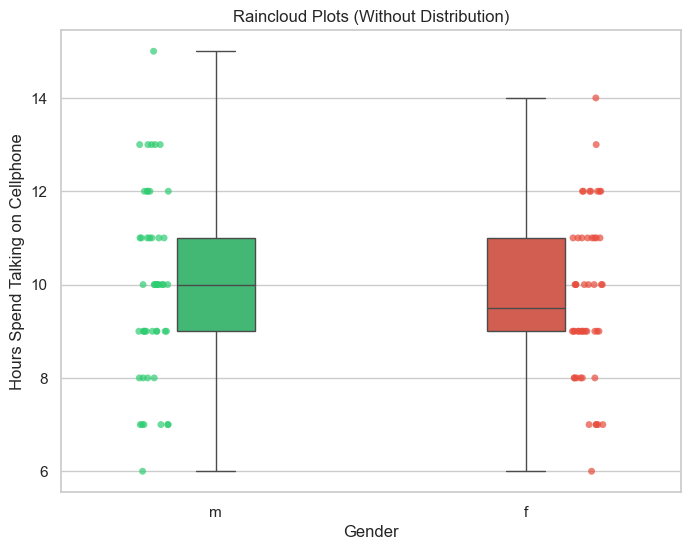

In [98]:
np.random.seed(42)
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.stripplot(x="Gender", y="Hours_Spent", data=combined_df_no_outlier, jitter=True, dodge=True, 
              hue="Gender", palette=["#2ECC71", "#E74C3C"], alpha=0.7, zorder=1, legend=False)

sns.boxplot(x="Gender", y="Hours_Spent", data=combined_df_no_outlier, whis=np.inf, fliersize=0, 
            hue="Gender", width=0.25, palette=["#2ECC71", "#E74C3C"], zorder=2, dodge=False, legend=False)

plt.title("Raincloud Plots (Without Distribution)")
plt.ylabel("Hours Spend Talking on Cellphone")
plt.xlabel("Gender")
plt.show()


#### Assumption 6
You have homogeneity of variances (i.e., the variance of the dependent variable is equal in each group of your independent variable).

To check for the equality of variance, let us use Levene's test for homogeneity of variances at a 0.05 significance level.

The null hypothesis: There is no significant difference in a normal distribution and the distribution of each group in terms of the number of hours spent talking on cellphones per week. <br>
The alternate hypothesis: The two groups are not normally distributedof hours spent talking on cellphones per weeks.

In [100]:
levene = levene(females_only_series, males_only_series)
print(levene)

LeveneResult(statistic=0.2444673109043188, pvalue=0.622115990194636)


Levene's test for homogeneity of variances to test for the equality of variances between the two groups. The result showed that there is no significant statistical evidence to reject the null hypothesis(*W*=.24,*p*=.62), therefore we have failed to reject the null hypothesis. Meaning, we have a homogeneity of variances between each group.

### Hypothesis Testing
We can now use the two-sample independent t-test. But let us first restate the hypothesis:

The goal is to determine if there is a statistically significant difference between the mean time spend on cell phones per week of males ($\mu_1$) and females ($\mu_2$) college students. We ought to statistical test to verify the significant validy of the following hypothesis:

**Null Hypothesis ($H_0$)**: There is no significant difference in the average time spent talking on cellphones per week between males and females attending Midwestern University ($\mu_1 = \mu_2$).

**Alternative Hypothesis ($H_1$)**: There is a significant difference between the average time spent talking on cellphones per week between males and females attending Midwestern University ($\mu_1 \neq \mu_2$).


In [102]:
ind_ttest = ttest_ind(males_only_series, females_only_series)
print(ind_ttest)

TtestResult(statistic=0.6277381082236607, pvalue=0.5316505676186108, df=97.0)


An independent samples t-test was conducted to test whether there is no statistical significant difference in the mean of the hours spent talking on cellphones between the male and female groups. The result indicated that there was no significant difference between male and female groups when it comes to their average time talking on their cellphone (*t*(97)=0.63,p=.53). **Therefore we have failed to reject the null hypothesis at a 0.05 significance level**

### Confidence Intervals
To calculate for confidence intervals for $\mu_1$, $\mu_2$, and $\mu_{1 \ - \ 2}$, we could use the following formula (Confidence Limit)

$$
S \pm t_c \cdot \sigma_S
$$
Where <br>
$S$ is the sample statistics; <br>
$t_c$ is the critical value in t-distribution of df=97 at a 0.05 level of significance, $t_c=1.984$;<br>
$\sigma_S$ is the standard error in terms of the sample statistics.

In [104]:
male_n = len(males_only_series)
female_n = len(females_only_series)
dif_n = len(combined_df_no_outlier)
males_mean = males_only_series.mean()
males_std = males_only_series.std()
female_mean = females_only_series.mean()
female_std = females_only_series.std()
dif_mean = males_mean - female_mean
dif_se = ((males_std**2 / male_n) + (female_std**2 / female_n)) ** 0.5
male_se = males_std / (male_n ** 0.5)
female_se = female_std / (female_n ** 0.5)

male_interval = (
    males_mean - (1.984 * male_se),
    males_mean + (1.984 * male_se)
)

female_interval = (
    female_mean - (1.984 * female_se),
    female_mean + (1.984 * female_se)
)

dif_interval = (
    dif_mean - (1.984 * dif_se),
    dif_mean + (1.984 * dif_se)
)

print("95% Confidence Interval for Males:", male_interval)
print("95% Confidence Interval for Females:", female_interval)
print("95% Confidence Interval for Difference:", dif_interval)

95% Confidence Interval for Males: (9.370714592062882, 10.50683642834528)
95% Confidence Interval for Females: (9.201778038154371, 10.198221961845627)
95% Confidence Interval for Difference: (-0.5168158674496921, 0.9943668878578562)


The 95% Confidence Intervals are as follows: <br>
Male: $[9.37, 10.51]$ <br>
Female: $[9.20, 10.20]$ <br>
Mean Difference: $[-0.52, 0.99]$

Meaning, the true mean of the population corresponding statistics lies within its corresponding interval.

To illustrate this, 

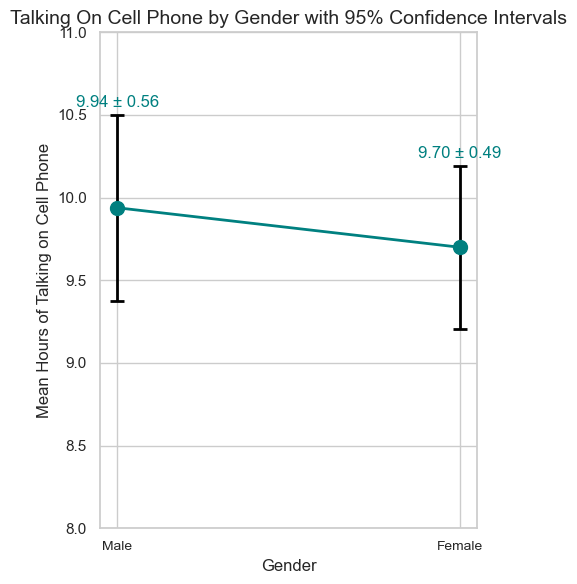

In [106]:
data = {
    'Gender': [0.9, 1.1],
    'Gender Label': ['Male', 'Female'],
    'Mean': [males_mean, female_mean],
    'SE': [male_se, female_se]
}

confidence_limits = 1.96 * np.array(data['SE'])
df_plot = pd.DataFrame(data)

sns.set(style="whitegrid")

plt.figure(figsize=(5, 6))
plt.errorbar(df_plot['Gender'], df_plot['Mean'], yerr=confidence_limits, fmt='o-', 
             color='teal', ecolor='black', capsize=5, capthick=2, markersize=10, linewidth=2)

for i, (x, y, ci) in enumerate(zip(df_plot['Gender'], df_plot['Mean'], confidence_limits)):
    plt.text(x, y + ci + 0.05, f"{y:.2f} ± {ci:.2f}", ha='center', color='teal')


plt.xticks([0.9, 1.1], df_plot['Gender Label'], fontsize=10)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Mean Hours of Talking on Cell Phone", fontsize=12)
plt.title("Talking On Cell Phone by Gender with 95% Confidence Intervals", fontsize=14)

plt.ylim(8, 11) 
plt.tight_layout()
plt.show()

As one can see, there's a significant overlap in confidence interval between groups, hence the minisicule mean difference interval, thus the rejection of null hypothesis. 

### Conclusion
An independent samples t-test was conducted to verify the null hypothesis $H:0$ There is no significant difference in the average time spent talking on cellphones per week between males and females attending Midwestern University ($\mu_1 = \mu_2$)) After confirming the requirements for two samples t-test and removing one extreme outlier in the male group detected by z-scoring method, at 0.05 significance level, the result showed that there were no significant difference between male and femal groups in terms of their average time talking on their cellphone (t(97)=0.63,p=.53). Thus we have failed to reject the null hypothesis at a 0.05 significant level. .
We have estimated at a 95% Confidence level that the true population parameter of the groups and their difference lies $[9.37, 10.51]$, $[9.20, 10.20]$, and $[-0.52, 0.99]$, for male mean, female mean, and the mean difference, respectively.


### Recommendation
**The larger the sample size, the better**. According to the Law of number, the more sample size we have, the closer we are to the population mean. Also, the higher our sample size, the lower the standar error ($SE = \sigma/\sqrt{N}$) will be. This is particularly helpful for estimating the interval for sample mean difference $(\mu_1 - \mu_2) \pm z_c SE$, thus resulting to less variability and more precise estimate. Not only that but by the Central Limit Theorem, the sample mean distribution for both the male and female groups will each approach a normal distribution, regardless of the population distribution. All in all, a larger sample size cannot hurt and certainly can help especially in our case because I have initially use IQR method to detect outliers but it turned out that deleting the flagged ourliers significantly affect the normality of the data (it fails with a p-value of 0.04 when it passes with 0.34 before deleting the outliers). So for the sample distribution to be more robust, we need a larger sample size.

As for the more testing part, I strongly recommend on **further deliberation on the experiment/testing design**. One instance is that researchers may consider conducting multiple tests across a set time interval (weekly, monthly, etc.) to identify the patterns and behaviours of students across time. In short, I'm recommending a time-series design. Or if the resources may not permit such extensive scope, they could just resort to test for same sample on different time and conduct a Paired Sample t Test. Researches may also consider other factors (course, age, grade) to provide more context to the student's behaviour. 

As convention, the researchers might still **use 0.05 significance level to be 95% confident** on their estimation of the parameter. Although I have used t-distribution, the researchers may opt to use the **z-scoring method for normal approximation to test the hypothesis of the mean differences between the two groups**. This is because generally speaking, a t-distribution of $N \geq 30$ will approximate a normal distribution. So each of p-value from their respective methods turns almost identitical to each other. Using the z-scoring method for large samples can provide similar results to the t-distribution, and for very large samples, the choice between the two methods becomes less critical in terms of accuracy.